In [46]:
%load_ext autoreload
%autoreload 2
import pickle
from datetime import datetime
import numpy as np
from qutip import *
import os
from matplotlib import pyplot as plt
import sys
from scipy.integrate import solve_ivp
import sandbox_correct as sb
import importlib
importlib.reload(sb)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'sandbox_correct' from '/home/saha/Desktop/tesis/colera/energy_shift/sandbox_correct.py'>

In [99]:
filepath = "normal_point_low_diss/eff_coupling_5.5MHz.pkl"

with open(filepath, 'rb') as f:
    loaded_data = pickle.load(f)

print(f"Multi-dynamics loaded from: {filepath}", flush=True)
print(f"Description: {loaded_data['description']}", flush=True)
print(f"Timestamp: {loaded_data['timestamp']}", flush=True)

# Return all four dynamics types
dynamics_normal_shift = loaded_data['full_dynamics_normal_shift']
dynamics_polaron_shift = loaded_data['full_dynamics_polaron_shift']
parameters = loaded_data['parameters']

Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_5.5MHz.pkl
Description: Full-dynamics for eff_coupling=5.5MHz
Timestamp: 20251112_095236


In [ ]:
N = parameters['N']
cavity_diss_rate = parameters['cavity_diss_rate']
input_power = parameters['input_power']
rabi_freq = parameters['rabi_freq']
eff_coupling = parameters['eff_coupling']
qubit_targetz = parameters['qubit_targetz']
norm = parameters['norm']
final_time__mus = parameters['final_time__mus'] 
time_steps = parameters["time_steps"]
psi0_atom = parameters['initial_state_qubit']
tlist = np.linspace(0, final_time__mus, time_steps)

cavity_photon_number = 10**(input_power/10)
qubit_detuning = qubit_targetz - eff_coupling*(2*cavity_photon_number + 1) 
qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*cavity_photon_number + 1)
cavity_detuning = (qubit_detuning_lamb_shift**2 + rabi_freq**2)**.5
cavity_drive_amplitude = np.real((cavity_photon_number * (cavity_detuning**2 + .25*cavity_diss_rate**2))**.5)
cavity_field = cavity_drive_amplitude/(-cavity_detuning + .5j*cavity_diss_rate)

d = tensor(destroy(N), qeye(2))   
sz = tensor(qeye(N), sigmaz())  
sx = tensor(qeye(N), sigmax())     
sm = tensor(qeye(N), sigmam()) 

x_exp = expect(sx, dynamics_normal_shift)
z_exp = expect(sz, dynamics_normal_shift)
photon_number = expect(d.dag()*d, dynamics_normal_shift)

H_qubit = sb.target_hamiltonian(parameters)
evalues_target, estates_target = H_qubit.eigenstates()
# For ground state
gs_sigmax = expect(sigmax(), estates_target[0])
gs_sigmaz = expect(sigmaz(), estates_target[0])

# For excited state
es_sigmax = expect(sigmax(), estates_target[1])
es_sigmaz = expect(sigmaz(), estates_target[1])

H_qubit_pol = sb.target_hamiltonian_polaron(parameters)
evalues_target_pol, estates_target_pol = H_qubit_pol.eigenstates()

# For ground state
gs_sigmax_pol = expect(sigmax(), estates_target_pol[0])
gs_sigmaz_pol = expect(sigmaz(), estates_target_pol[0])

# For excited state
es_sigmax_pol = expect(sigmax(), estates_target_pol[1])
es_sigmaz_pol = expect(sigmaz(), estates_target_pol[1])



qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*cavity_photon_number + 1)

theta = np.arctan2(rabi_freq, qubit_detuning_lamb_shift)

U = (1j * theta/2 * sigmay()).expm()

qubit_dynamics = [ptrace(i, 1) for i in  dynamics_normal_shift]
dynamics_non_polaron_frame = np.array([U*i*U.dag() for i in qubit_dynamics])
x_exp_non_polaron_frame = np.array([expect(sigmax(), i) for i in dynamics_non_polaron_frame])
z_exp_non_polaron_frame = np.array([expect(sigmaz(), i) for i in dynamics_non_polaron_frame])



cavity_field_e = cavity_drive_amplitude/(-(cavity_detuning + eff_coupling) + .5j*cavity_diss_rate)
cavity_field_g = cavity_drive_amplitude/(-(cavity_detuning - eff_coupling) + .5j*cavity_diss_rate)
qubit_detuning_lamb_shift_pol = qubit_detuning + eff_coupling*(2*np.real(cavity_field_g*np.conj(cavity_field_e))+ 1)


theta_pol = np.arctan2(rabi_freq, qubit_detuning_lamb_shift_pol)

U_pol = (1j * theta_pol/2 * sigmay()).expm()

dynamics_polaron_frame = np.array([U_pol*i*U_pol.dag() for i in qubit_dynamics])
x_exp_polaron_frame = np.array([expect(sigmax(), i) for i in dynamics_polaron_frame])
z_exp_polaron_frame = np.array([expect(sigmaz(), i) for i in dynamics_polaron_frame])



In [121]:
filepath = "normal_point_low_diss/eff_coupling_6.0MHz.pkl"

with open(filepath, 'rb') as f:
    loaded_data = pickle.load(f)

print(f"Multi-dynamics loaded from: {filepath}", flush=True)
print(f"Description: {loaded_data['description']}", flush=True)
print(f"Timestamp: {loaded_data['timestamp']}", flush=True)

# Return all four dynamics types
dynamics_normal_shift = loaded_data['full_dynamics_normal_shift']
dynamics_polaron_shift = loaded_data['full_dynamics_polaron_shift']
parameters = loaded_data['parameters']

N = parameters['N']
cavity_diss_rate = parameters['cavity_diss_rate']
input_power = parameters['input_power']
rabi_freq = parameters['rabi_freq']
eff_coupling = parameters['eff_coupling']
qubit_targetz = parameters['qubit_targetz']
norm = parameters['norm']
final_time__mus = parameters['final_time__mus'] 
time_steps = parameters["time_steps"]
psi0_atom = parameters['initial_state_qubit']
tlist = np.linspace(0, final_time__mus, time_steps)

cavity_photon_number = 10**(input_power/10)
qubit_detuning = qubit_targetz - eff_coupling*(2*cavity_photon_number + 1) 
qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*cavity_photon_number + 1)
cavity_detuning = (qubit_detuning_lamb_shift**2 + rabi_freq**2)**.5
cavity_drive_amplitude = np.real((cavity_photon_number * (cavity_detuning**2 + .25*cavity_diss_rate**2))**.5)
cavity_field = cavity_drive_amplitude/(-cavity_detuning + .5j*cavity_diss_rate)

H_qubit = sb.target_hamiltonian(parameters)
evalues_target, estates_target = H_qubit.eigenstates()

print(fidelity(estates_target[0], ptrace(dynamics_normal_shift[-1],1)))
print(tracedist(estates_target[0], ptrace(dynamics_normal_shift[-1],1)))

H_qubit_pol = sb.target_hamiltonian_polaron(parameters)
evalues_target_pol, estates_target_pol = H_qubit_pol.eigenstates()

print(fidelity(estates_target_pol[0], ptrace(dynamics_normal_shift[-1],1)))
print(tracedist(estates_target_pol[0], ptrace(dynamics_normal_shift[-1],1)))

Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_6.0MHz.pkl
Description: Full-dynamics for eff_coupling=6MHz
Timestamp: 20251112_112619
0.9746904322879076
0.05973874054769791
0.9752790965817264
0.049202029292951935


Analyzing dynamics in folder: normal_point_low_diss
Analyzing coupling: 1.0 MHz
Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_1.0MHz.pkl
Description: Full-dynamics for eff_coupling=1MHz
Timestamp: 20251111_195019


  Fidelity (normal): 0.9994
  Fidelity (polaron): 0.9994
  Trace dist (normal): 0.0013
  Trace dist (polaron): 0.0013
Analyzing coupling: 1.5 MHz
Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_1.5MHz.pkl
Description: Full-dynamics for eff_coupling=1.5MHz
Timestamp: 20251111_212322
  Fidelity (normal): 0.9986
  Fidelity (polaron): 0.9986
  Trace dist (normal): 0.0029
  Trace dist (polaron): 0.0029
Analyzing coupling: 2.0 MHz
Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_2.0MHz.pkl
Description: Full-dynamics for eff_coupling=2MHz
Timestamp: 20251111_225712
  Fidelity (normal): 0.9974
  Fidelity (polaron): 0.9974
  Trace dist (normal): 0.0053
  Trace dist (polaron): 0.0052
Analyzing coupling: 2.5 MHz
Multi-dynamics loaded from: normal_point_low_diss/eff_coupling_2.5MHz.pkl
Description: Full-dynamics for eff_coupling=2.5MHz
Timestamp: 20251112_003035
  Fidelity (normal): 0.9959
  Fidelity (polaron): 0.9959
  Trace dist (normal): 0.0084
  Trace dist (polaron

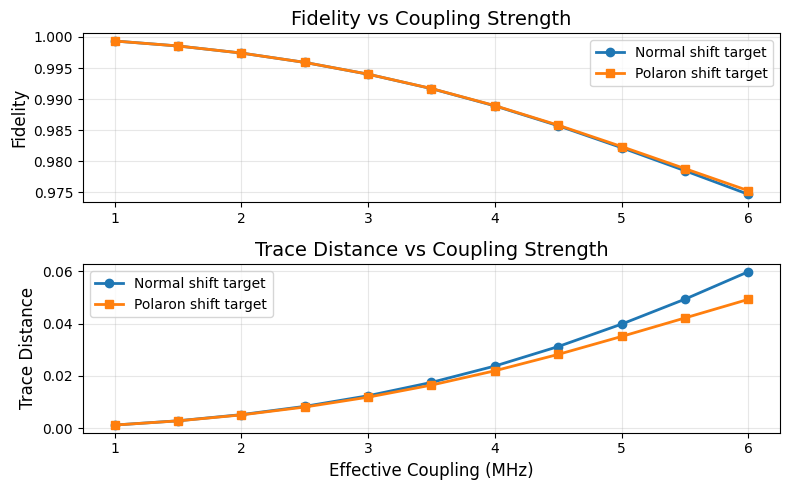

0.5

In [120]:
import glob
import re
def analyze_coupling_dependence(folder_path):
    """
    Analyze all dynamics files in a folder and compute trace distances and fidelities
    vs coupling strength
    """
    # Find all pickle files in the folder
    pattern = os.path.join(folder_path, "eff_coupling_*.pkl")
    files = glob.glob(pattern)
    
    if not files:
        print(f"No files found matching pattern: {pattern}")
        return None
    
    # Extract coupling values and sort files
    coupling_data = []
    for filepath in files:
        # Extract coupling value from filename
        match = re.search(r'eff_coupling_([\d.]+)MHz\.pkl', filepath)
        if match:
            coupling = float(match.group(1))
            coupling_data.append((coupling, filepath))
    
    # Sort by coupling strength
    coupling_data.sort(key=lambda x: x[0])
    
    # Initialize results arrays
    couplings = []
    fid_normal = []
    fid_polaron = []
    trace_normal = []
    trace_polaron = []
    
    # Analyze each file using your code structure
    for coupling, filepath in coupling_data:
        print(f"Analyzing coupling: {coupling} MHz")
        
        try:
            with open(filepath, 'rb') as f:
                loaded_data = pickle.load(f)

            print(f"Multi-dynamics loaded from: {filepath}", flush=True)
            print(f"Description: {loaded_data['description']}", flush=True)
            print(f"Timestamp: {loaded_data['timestamp']}", flush=True)

            # Return all four dynamics types
            dynamics_normal_shift = loaded_data['full_dynamics_normal_shift']
            dynamics_polaron_shift = loaded_data['full_dynamics_polaron_shift']
            parameters = loaded_data['parameters']

            N = parameters['N']
            cavity_diss_rate = parameters['cavity_diss_rate']
            input_power = parameters['input_power']
            rabi_freq = parameters['rabi_freq']
            eff_coupling = parameters['eff_coupling']
            qubit_targetz = parameters['qubit_targetz']
            norm = parameters['norm']
            final_time__mus = parameters['final_time__mus'] 
            time_steps = parameters["time_steps"]
            psi0_atom = parameters['initial_state_qubit']
            tlist = np.linspace(0, final_time__mus, time_steps)

            cavity_photon_number = 10**(input_power/10)
            qubit_detuning = qubit_targetz - eff_coupling*(2*cavity_photon_number + 1) 
            qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*cavity_photon_number + 1)
            cavity_detuning = (qubit_detuning_lamb_shift**2 + rabi_freq**2)**.5
            cavity_drive_amplitude = np.real((cavity_photon_number * (cavity_detuning**2 + .25*cavity_diss_rate**2))**.5)
            cavity_field = cavity_drive_amplitude/(-cavity_detuning + .5j*cavity_diss_rate)

            H_qubit = sb.target_hamiltonian(parameters)
            evalues_target, estates_target = H_qubit.eigenstates()

            # Get final qubit state from normal shift dynamics
            final_qubit_state_normal = ptrace(dynamics_normal_shift[-1], 1)
            
            # Calculate metrics for normal shift target
            fid_norm = fidelity(estates_target[0], final_qubit_state_normal)
            trace_norm = tracedist(estates_target[0], final_qubit_state_normal)

            H_qubit_pol = sb.target_hamiltonian_polaron(parameters)
            evalues_target_pol, estates_target_pol = H_qubit_pol.eigenstates()

            # Calculate metrics for polaron shift target
            fid_pol = fidelity(estates_target_pol[0], final_qubit_state_normal)
            trace_pol = tracedist(estates_target_pol[0], final_qubit_state_normal)

            # Store results
            couplings.append(coupling)
            fid_normal.append(fid_norm)
            fid_polaron.append(fid_pol)
            trace_normal.append(trace_norm)
            trace_polaron.append(trace_pol)
            
            print(f"  Fidelity (normal): {fid_norm:.4f}")
            print(f"  Fidelity (polaron): {fid_pol:.4f}")
            print(f"  Trace dist (normal): {trace_norm:.4f}")
            print(f"  Trace dist (polaron): {trace_pol:.4f}")
            
        except Exception as e:
            print(f"Error analyzing {filepath}: {e}")
            continue
    
    return {
        'couplings': np.array(couplings),
        'fidelity_normal': np.array(fid_normal),
        'fidelity_polaron': np.array(fid_polaron),
        'trace_dist_normal': np.array(trace_normal),
        'trace_dist_polaron': np.array(trace_polaron)
    }

def plot_coupling_dependence(results):
    """Plot trace distance and fidelity vs coupling strength"""
    if results is None:
        print("No results to plot")
        return
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))
    
    # Plot fidelity
    ax1.plot(results['couplings'], results['fidelity_normal'], 'o-', 
             label='Normal shift target', linewidth=2, markersize=6)
    ax1.plot(results['couplings'], results['fidelity_polaron'], 's-', 
             label='Polaron shift target', linewidth=2, markersize=6)
    ax1.set_ylabel('Fidelity', fontsize=12)
    # ax1.set_ylim(0, 1)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Fidelity vs Coupling Strength', fontsize=14)
    
    # Plot trace distance
    ax2.plot(results['couplings'], results['trace_dist_normal'], 'o-', 
             label='Normal shift target', linewidth=2, markersize=6)
    ax2.plot(results['couplings'], results['trace_dist_polaron'], 's-', 
             label='Polaron shift target', linewidth=2, markersize=6)
    ax2.set_xlabel('Effective Coupling (MHz)', fontsize=12)
    ax2.set_ylabel('Trace Distance', fontsize=12)
    # ax2.set_ylim(0, 1)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Trace Distance vs Coupling Strength', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return fig

folder_path = "normal_point_low_diss"  # Change this to your folder path
    
print(f"Analyzing dynamics in folder: {folder_path}")
results = analyze_coupling_dependence(folder_path)

if results is not None:
    # Print summary
    print("\n=== Summary ===")
    print(f"Couplings analyzed: {results['couplings']}")
    print(f"Fidelity (normal): {results['fidelity_normal']}")
    print(f"Fidelity (polaron): {results['fidelity_polaron']}")
    
    # Create plots
    fig = plot_coupling_dependence(results)
    
    # Save results if needed
    # np.savez('coupling_dependence_results.npz', **results)
else:
    print("No results to display")

parameters["cavity_diss_rate"]/(2*np.pi*10**6)

/tmp/ipykernel_160672/1219854472.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes1[0].legend()
/tmp/ipykernel_160672/1219854472.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes1[1].legend()
/tmp/ipykernel_160672/1219854472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes2[0].legend()
/tmp/ipykernel_160672/1219854472.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes2[1].legend()


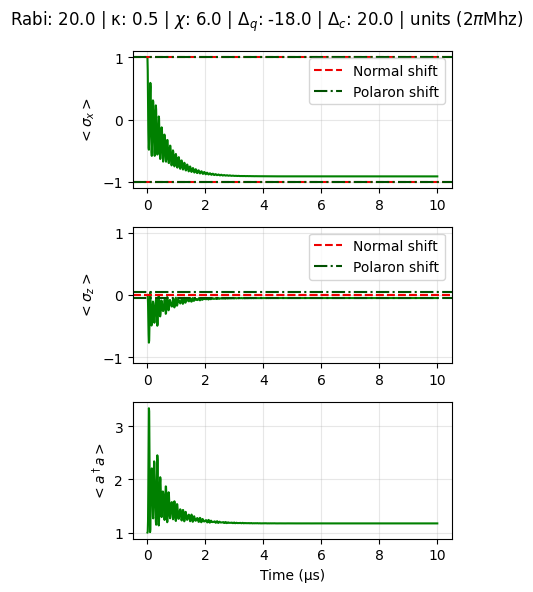

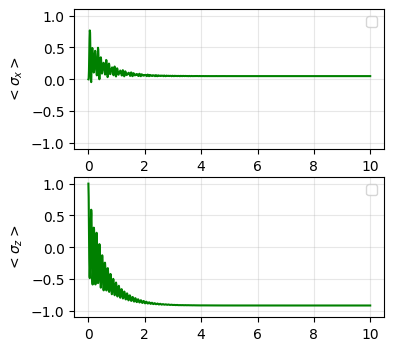

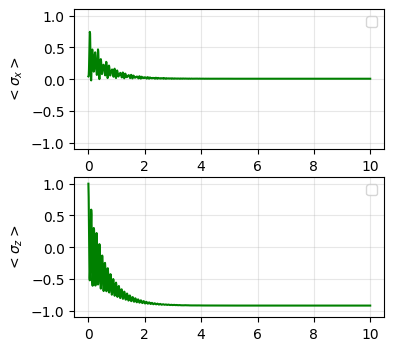

In [122]:
# Generate plot
max_time = 10
if max_time is None:
    max_time = max(tlist)

time_mask = tlist <= max_time
tlist_plot = tlist[time_mask]

# Create plot
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

# Plot only up to max_time
axes[0].plot(tlist_plot, x_exp[time_mask], color='#008000')
axes[1].plot(tlist_plot, z_exp[time_mask], color='#008000')
axes[2].plot(tlist_plot, photon_number[time_mask], color='#008000')

#compare with target hamiltonian expecation values:
axes[0].axhline(gs_sigmax,  ls='--', color='#EE0000', label="Normal shift")
axes[0].axhline(es_sigmax, ls='--', color='#EE0000')
axes[1].axhline(gs_sigmaz, ls='--', color='#EE0000', label="Normal shift")
axes[1].axhline(es_sigmaz, ls='--', color='#EE0000')

axes[0].axhline(gs_sigmax_pol, ls='-.', color='#005000', label="Polaron shift")
axes[0].axhline(es_sigmax_pol, ls='-.', color='#005000')
axes[1].axhline(gs_sigmaz_pol, ls='-.', color='#005000', label="Polaron shift")
axes[1].axhline(es_sigmaz_pol, ls='-.', color='#005000')

# Format σ_x plot
axes[0].set_ylabel(r'$<\sigma_x>$')
axes[0].legend()
axes[0].set_ylim(-1.1, 1.1)
axes[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes[1].set_ylabel(r'$<\sigma_z>$')
axes[1].legend()
axes[1].set_ylim(-1.1, 1.1)
axes[1].grid(True, alpha=0.3)

# Format photon number plot
axes[2].set_ylabel(r'$<a^\dagger a>$')
axes[2].set_xlabel('Time (μs)')
axes[2].grid(True, alpha=0.3)


params_text = []
params_text.append(f"Rabi: {rabi_freq/(2*np.pi*1e6):.1f}")
params_text.append(f"κ: {cavity_diss_rate/(2*np.pi*1e6):.1f}")
params_text.append(r"$\chi$" + f": {eff_coupling/(2*np.pi*1e6):.1f}")
params_text.append(r"$\Delta_q$" + f": {qubit_detuning/(2*np.pi*1e6):.1f}")
params_text.append(r"$\Delta_c$" + f": {cavity_detuning/(2*np.pi*1e6):.1f}")

params_text.append(r"units (2$\pi$Mhz)")

plt.suptitle(' | '.join(params_text), y=0.98)
plt.tight_layout()

fig1, axes1 = plt.subplots(2, 1, figsize=(4, 4))

axes1[0].plot(tlist_plot, x_exp_non_polaron_frame[time_mask], color='#008000')
axes1[1].plot(tlist_plot, z_exp_non_polaron_frame[time_mask], color='#008000')

# Format σ_x plot
axes1[0].set_ylabel(r'$<\sigma_x>$')
axes1[0].legend()
axes1[0].set_ylim(-1.1, 1.1)
axes1[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes1[1].set_ylabel(r'$<\sigma_z>$')
axes1[1].legend()
axes1[1].set_ylim(-1.1, 1.1)
axes1[1].grid(True, alpha=0.3)

fig2, axes2 = plt.subplots(2, 1, figsize=(4, 4))

axes2[0].plot(tlist_plot, x_exp_polaron_frame[time_mask], color='#008000')
axes2[1].plot(tlist_plot, z_exp_polaron_frame[time_mask], color='#008000')

# Format σ_x plot
axes2[0].set_ylabel(r'$<\sigma_x>$')
axes2[0].legend()
axes2[0].set_ylim(-1.1, 1.1)
axes2[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes2[1].set_ylabel(r'$<\sigma_z>$')
axes2[1].legend()
axes2[1].set_ylim(-1.1, 1.1)
axes2[1].grid(True, alpha=0.3)


In [92]:
N = parameters['N']
cavity_diss_rate = parameters['cavity_diss_rate']
input_power = parameters['input_power']
rabi_freq = parameters['rabi_freq']
eff_coupling = parameters['eff_coupling']
qubit_targetz = parameters['qubit_targetz']
norm = parameters['norm']
final_time__mus = parameters['final_time__mus'] 
time_steps = parameters["time_steps"]
psi0_atom = parameters['initial_state_qubit']
tlist = np.linspace(0, final_time__mus, time_steps)

cavity_photon_number = 10**(input_power/10)
qubit_detuning = qubit_targetz - eff_coupling*(2*np.real(cavity_field_g*np.conj(cavity_field_e))+ 1)
qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*np.real(cavity_field_g*np.conj(cavity_field_e))+ 1)
cavity_detuning = (qubit_detuning_lamb_shift**2 + rabi_freq**2)**.5
cavity_drive_amplitude = np.real((cavity_photon_number * (cavity_detuning**2 + .25*cavity_diss_rate**2))**.5)
cavity_field = cavity_drive_amplitude/(-cavity_detuning + .5j*cavity_diss_rate)

d = tensor(destroy(N), qeye(2))   
sz = tensor(qeye(N), sigmaz())  
sx = tensor(qeye(N), sigmax())     
sm = tensor(qeye(N), sigmam()) 

x_exp = expect(sx, dynamics_polaron_shift)
z_exp = expect(sz, dynamics_polaron_shift)
photon_number = expect(d.dag()*d, dynamics_polaron_shift)

H_qubit = sb.target_hamiltonian(parameters)
evalues_target, estates_target = H_qubit.eigenstates()
# For ground state
gs_sigmax = expect(sigmax(), estates_target[0])
gs_sigmaz = expect(sigmaz(), estates_target[0])

# For excited state
es_sigmax = expect(sigmax(), estates_target[1])
es_sigmaz = expect(sigmaz(), estates_target[1])

H_qubit_pol = sb.target_hamiltonian_polaron(parameters)
evalues_target_pol, estates_target_pol = H_qubit_pol.eigenstates()

# For ground state
gs_sigmax_pol = expect(sigmax(), estates_target_pol[0])
gs_sigmaz_pol = expect(sigmaz(), estates_target_pol[0])

# For excited state
es_sigmax_pol = expect(sigmax(), estates_target_pol[1])
es_sigmaz_pol = expect(sigmaz(), estates_target_pol[1])



qubit_detuning_lamb_shift = qubit_detuning + eff_coupling*(2*cavity_photon_number + 1)

theta = np.arctan2(rabi_freq, qubit_detuning_lamb_shift)

U = (1j * theta/2 * sigmay()).expm()

qubit_dynamics = [ptrace(i, 1) for i in  dynamics_normal_shift]
dynamics_non_polaron_frame = np.array([U*i*U.dag() for i in qubit_dynamics])
x_exp_non_polaron_frame = np.array([expect(sigmax(), i) for i in dynamics_non_polaron_frame])
z_exp_non_polaron_frame = np.array([expect(sigmaz(), i) for i in dynamics_non_polaron_frame])



cavity_field_e = cavity_drive_amplitude/(-(cavity_detuning + eff_coupling) + .5j*cavity_diss_rate)
cavity_field_g = cavity_drive_amplitude/(-(cavity_detuning - eff_coupling) + .5j*cavity_diss_rate)
qubit_detuning_lamb_shift_pol = qubit_detuning + eff_coupling*(2*np.real(cavity_field_g*np.conj(cavity_field_e))+ 1)


theta_pol = np.arctan2(rabi_freq, qubit_detuning_lamb_shift_pol)

U_pol = (1j * theta_pol/2 * sigmay()).expm()

dynamics_polaron_frame = np.array([U_pol*i*U_pol.dag() for i in qubit_dynamics])
x_exp_polaron_frame = np.array([expect(sigmax(), i) for i in dynamics_polaron_frame])
z_exp_polaron_frame = np.array([expect(sigmaz(), i) for i in dynamics_polaron_frame])



/tmp/ipykernel_160672/2377407930.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes1[0].legend()
/tmp/ipykernel_160672/2377407930.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes1[1].legend()
/tmp/ipykernel_160672/2377407930.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes2[0].legend()
/tmp/ipykernel_160672/2377407930.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes2[1].legend()


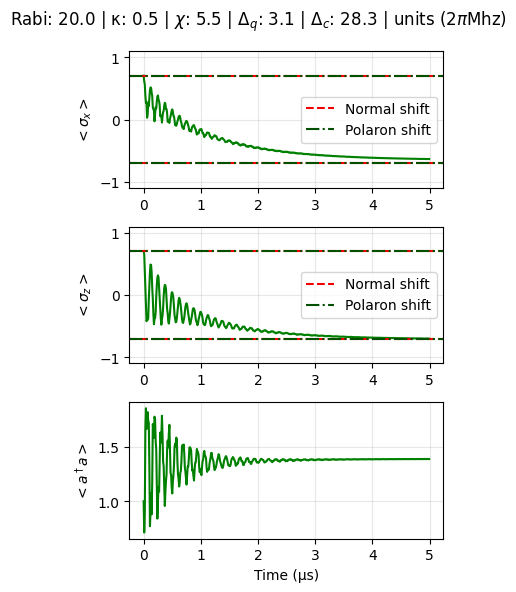

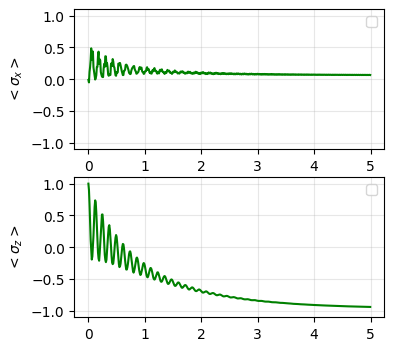

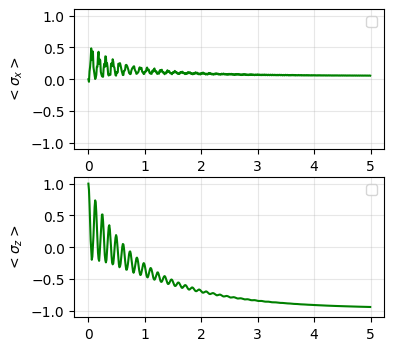

In [93]:
# Generate plot
max_time = 5
if max_time is None:
    max_time = max(tlist)

time_mask = tlist <= max_time
tlist_plot = tlist[time_mask]

# Create plot
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

# Plot only up to max_time
axes[0].plot(tlist_plot, x_exp[time_mask], color='#008000')
axes[1].plot(tlist_plot, z_exp[time_mask], color='#008000')
axes[2].plot(tlist_plot, photon_number[time_mask], color='#008000')

#compare with target hamiltonian expecation values:
axes[0].axhline(gs_sigmax,  ls='--', color='#EE0000', label="Normal shift")
axes[0].axhline(es_sigmax, ls='--', color='#EE0000')
axes[1].axhline(gs_sigmaz, ls='--', color='#EE0000', label="Normal shift")
axes[1].axhline(es_sigmaz, ls='--', color='#EE0000')

axes[0].axhline(gs_sigmax_pol, ls='-.', color='#005000', label="Polaron shift")
axes[0].axhline(es_sigmax_pol, ls='-.', color='#005000')
axes[1].axhline(gs_sigmaz_pol, ls='-.', color='#005000', label="Polaron shift")
axes[1].axhline(es_sigmaz_pol, ls='-.', color='#005000')

# Format σ_x plot
axes[0].set_ylabel(r'$<\sigma_x>$')
axes[0].legend()
axes[0].set_ylim(-1.1, 1.1)
axes[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes[1].set_ylabel(r'$<\sigma_z>$')
axes[1].legend()
axes[1].set_ylim(-1.1, 1.1)
axes[1].grid(True, alpha=0.3)

# Format photon number plot
axes[2].set_ylabel(r'$<a^\dagger a>$')
axes[2].set_xlabel('Time (μs)')
axes[2].grid(True, alpha=0.3)


params_text = []
params_text.append(f"Rabi: {rabi_freq/(2*np.pi*1e6):.1f}")
params_text.append(f"κ: {cavity_diss_rate/(2*np.pi*1e6):.1f}")
params_text.append(r"$\chi$" + f": {eff_coupling/(2*np.pi*1e6):.1f}")
params_text.append(r"$\Delta_q$" + f": {qubit_detuning/(2*np.pi*1e6):.1f}")
params_text.append(r"$\Delta_c$" + f": {cavity_detuning/(2*np.pi*1e6):.1f}")

params_text.append(r"units (2$\pi$Mhz)")

plt.suptitle(' | '.join(params_text), y=0.98)
plt.tight_layout()

fig1, axes1 = plt.subplots(2, 1, figsize=(4, 4))

axes1[0].plot(tlist_plot, x_exp_non_polaron_frame[time_mask], color='#008000')
axes1[1].plot(tlist_plot, z_exp_non_polaron_frame[time_mask], color='#008000')

# Format σ_x plot
axes1[0].set_ylabel(r'$<\sigma_x>$')
axes1[0].legend()
axes1[0].set_ylim(-1.1, 1.1)
axes1[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes1[1].set_ylabel(r'$<\sigma_z>$')
axes1[1].legend()
axes1[1].set_ylim(-1.1, 1.1)
axes1[1].grid(True, alpha=0.3)

fig2, axes2 = plt.subplots(2, 1, figsize=(4, 4))

axes2[0].plot(tlist_plot, x_exp_polaron_frame[time_mask], color='#008000')
axes2[1].plot(tlist_plot, z_exp_polaron_frame[time_mask], color='#008000')

# Format σ_x plot
axes2[0].set_ylabel(r'$<\sigma_x>$')
axes2[0].legend()
axes2[0].set_ylim(-1.1, 1.1)
axes2[0].grid(True, alpha=0.3)

# Format σ_z plot  
axes2[1].set_ylabel(r'$<\sigma_z>$')
axes2[1].legend()
axes2[1].set_ylim(-1.1, 1.1)
axes2[1].grid(True, alpha=0.3)
